# Predicting traffic volume

In [2]:
#importing the libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset

In [3]:
df = pd.read_csv('metro traffic.csv',delimiter=',')

Quick view to some data

In [192]:
df.head(30)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


Data types. Always good to check

df.dtypes

Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B13212E550>,
      dtype=object)

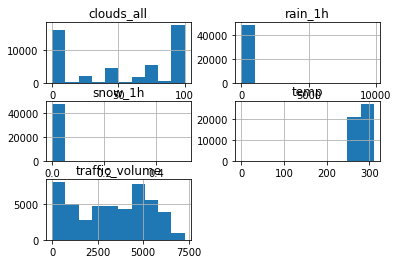

In [10]:
df.hist()

## List of values per Categorical attributes

### Holidays

In [6]:
df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [12]:
df['holiday'].value_counts()

None                         48143
Labor Day                        7
Martin Luther King Jr Day        6
New Years Day                    6
Christmas Day                    6
Thanksgiving Day                 6
Memorial Day                     5
Washingtons Birthday             5
State Fair                       5
Columbus Day                     5
Independence Day                 5
Veterans Day                     5
Name: holiday, dtype: int64

### Weather main

In [13]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [14]:
df['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

### Weather description

In [15]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [16]:
df['weather_description'].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

### Datetime

In [17]:
df['date_time'].unique()

array(['2012-10-02 09:00:00', '2012-10-02 10:00:00',
       '2012-10-02 11:00:00', ..., '2018-09-30 21:00:00',
       '2018-09-30 22:00:00', '2018-09-30 23:00:00'], dtype=object)

In [18]:
df['date_time'].value_counts()

2013-04-18 22:00:00    6
2013-05-19 10:00:00    6
2017-11-05 01:00:00    5
2018-04-13 21:00:00    5
2013-12-03 13:00:00    5
                      ..
2017-10-21 23:00:00    1
2014-03-07 17:00:00    1
2017-03-06 12:00:00    1
2016-06-24 00:00:00    1
2017-10-30 08:00:00    1
Name: date_time, Length: 40575, dtype: int64

There is some to do with this attribute. I will extract the month and hour because I think will be relevants.

## Numeric values description

In [40]:
att_list = ['clouds_all','rain_1h', 'temp','snow_1h','traffic_volume']

In [41]:
df[att_list].describe()

,clouds_all,rain_1h,temp,snow_1h,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,49.362231,0.334264,281.205870,0.000222,3259.818355
std,39.015750,44.789133,13.338232,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,272.160000,0.000000,1193.000000
50%,64.000000,0.000000,282.450000,0.000000,3380.000000
75%,90.000000,0.000000,291.806000,0.000000,4933.000000
max,100.000000,9831.300000,310.070000,0.510000,7280.000000


In [42]:
df[att_list].median()

clouds_all          64.00
rain_1h              0.00
temp               282.45
snow_1h              0.00
traffic_volume    3380.00
dtype: float64

I could say there is somethin strange going on rain_1h. Let's do a deeper research

### Numeric Values deep research

#### clouds_all

(array([16127.,   287.,  2039.,   356.,  4331.,   203.,  1748.,  5237.,
          431., 17445.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

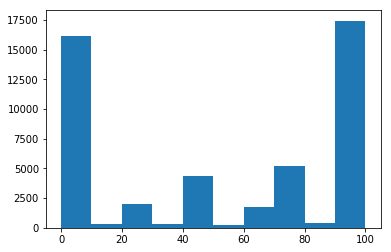

In [38]:
plt.hist(df['clouds_all'])

(array([  10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   99.,  936., 2205., 3324., 6422., 8120.,
        5700., 8685., 8835., 3583.,  285.]),
 array([  0.    ,   6.2014,  12.4028,  18.6042,  24.8056,  31.007 ,
         37.2084,  43.4098,  49.6112,  55.8126,  62.014 ,  68.2154,
         74.4168,  80.6182,  86.8196,  93.021 ,  99.2224, 105.4238,
        111.6252, 117.8266, 124.028 , 130.2294, 136.4308, 142.6322,
        148.8336, 155.035 , 161.2364, 167.4378, 173.6392, 179.8406,
        186.042 , 192.2434, 198.4448, 204.6462, 210.8476, 217.049 ,
        223.2504, 229.4518, 235.6532, 241.8546, 248.056 , 254.2574,
        260.4588, 266.6602, 272.8616, 279.063 , 285.2644, 291.4658,
        297.6672, 303.8686, 310.07  ]),
 <a list of 50 P

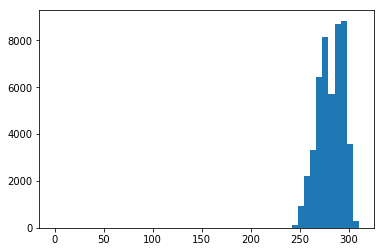

In [51]:
plt.hist(df['temp'],bins=50)

(array([1.4749e+04, 5.0000e+00, 1.0970e+03, 6.0000e+00, 2.7000e+02,
        5.0000e+00, 2.7600e+02, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        1.8490e+03, 0.0000e+00, 1.9000e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.8500e+02, 0.0000e+00, 1.6900e+02, 2.0000e+00,
        3.9930e+03, 2.0000e+00, 1.4700e+02, 9.0000e+00, 1.8000e+02,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.7900e+02, 2.0000e+01,
        2.0000e+00, 7.0000e+00, 1.5580e+03, 2.0000e+00, 1.7900e+02,
        4.0000e+00, 3.0000e+00, 5.0690e+03, 1.6000e+02, 1.0000e+00,
        1.9200e+02, 5.0000e+00, 1.8000e+01, 2.0000e+01, 1.9600e+02,
        1.6454e+04, 8.1000e+02, 0.0000e+00, 2.2000e+01, 1.5900e+02]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  9

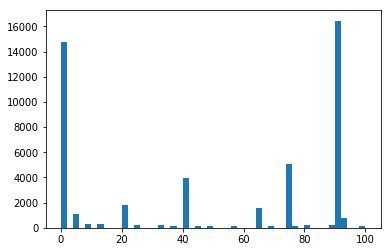

In [52]:
plt.hist(df['clouds_all'],bins=50)

(array([4.8141e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4000e+01,
        1.2000e+01, 0.0000e+00, 2.0000e+00, 0.0000e+00, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([0.    , 0.0102, 0.0204, 0.0306, 0.0408, 0.051 , 0.0612, 0.0714,
        0.0816, 0.0918, 0.102 , 0.1122, 0.1224, 0.1326, 0.1428, 0.153 ,
        0.1632, 0.1734, 0.1836, 0.1938, 0.204 , 0.2142, 0.2244, 0.2346,
        0.2448, 0.255 , 0.2652, 0.2754, 0.2856, 0.2958, 0.306 , 0.3162,
        0.3264, 0.3366, 0.3468

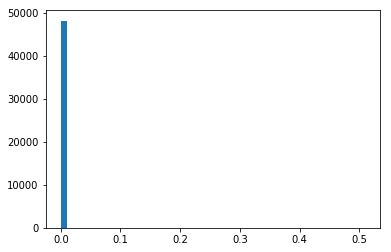

In [50]:
plt.hist(df['snow_1h'],bins=50)

(array([4.8203e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0.   ,  196.626,  393.252,  589.878,  786.504,  983.13 ,
        1179.756, 1376.382, 1573.008, 1769.634, 1966.26 , 2162.886,
        2359.512, 2556.138, 2752.764, 2949.39 , 3146.016, 3342.642,
        3539.268, 3735.894, 3932.52 , 4129.146, 4325.772, 4522.398,
        4719.024, 4915.65 , 5112.276, 5308.902

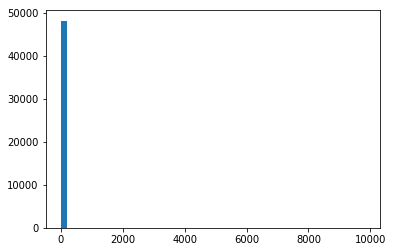

In [54]:
plt.hist(df['rain_1h'],bins=50)

(array([  59.,    9.,   71.,  949., 2223., 1724.,  840.,  778.,  711.,
         725.,  768.,  979.,  752.,  530.,  402.,  374.,  381.,  325.,
         301.,  290.,  291.,  241.,  266.,  271.,  256.,  304.,  280.,
         286.,  341.,  303.,  295.,  305.,  326.,  397.,  444.,  514.,
         564.,  609.,  657.,  642.,  624.,  604.,  535.,  505.,  469.,
         402.,  398.,  426.,  421.,  386.,  332.,  331.,  325.,  381.,
         366.,  407.,  431.,  507.,  597.,  665.,  711.,  800.,  896.,
         744.,  830.,  875.,  786.,  801.,  755.,  690.,  669.,  637.,
         578.,  592.,  585.,  464.,  474.,  584.,  521.,  532.,  584.,
         502.,  449.,  429.,  370.,  344.,  365.,  286.,  273.,  255.,
         251.,  185.,  156.,  132.,   94.,   42.,   29.,   25.,    8.,
           6.]),
 array([   0. ,   72.8,  145.6,  218.4,  291.2,  364. ,  436.8,  509.6,
         582.4,  655.2,  728. ,  800.8,  873.6,  946.4, 1019.2, 1092. ,
        1164.8, 1237.6, 1310.4, 1383.2, 1456. , 1528.8, 16

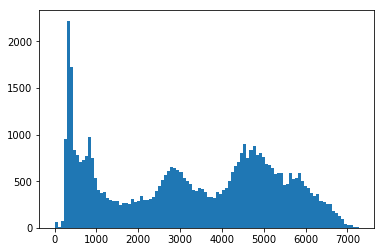

In [49]:
plt.hist(df['traffic_volume'],bins=100)

# Preprocessing data

Holiday attribute could be treated separately. So I will delete it for this case.

In [64]:
df_cleaned = df.drop(columns='holiday')

In [65]:
df_cleaned.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


We have to do some arragements with date_time: We will take month and hour

In [154]:
date_time = pd.to_datetime(df['date_time'])

In [156]:
month = date_time.dt.month
hour = date_time.dt.hour

Declaring new columns

In [158]:
df_cleaned['month']=month

In [160]:
df_cleaned['hour']=hour

In [162]:
df_cleaned.tail()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,hour
48199,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,9,19
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,9,20
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,9,21
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,9,22
48203,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954,9,23


Now drop date_time

In [163]:
df_cleaned = df_cleaned.drop(columns='date_time')

In [164]:
df_cleaned.tail()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,month,hour
48199,283.45,0.0,0.0,75,Clouds,broken clouds,3543,9,19
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,9,20
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,9,21
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,9,22
48203,282.12,0.0,0.0,90,Clouds,overcast clouds,954,9,23


Reorder this. Porque no me gusta ver la clase a predecir en el medio

In [165]:
df_cleaned=df_cleaned[['temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description','month','hour','traffic_volume']]

In [167]:
df_cleaned.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,month,hour,traffic_volume
0,288.28,0.0,0.0,40,Clouds,scattered clouds,10,9,5545
1,289.36,0.0,0.0,75,Clouds,broken clouds,10,10,4516
2,289.58,0.0,0.0,90,Clouds,overcast clouds,10,11,4767
3,290.13,0.0,0.0,90,Clouds,overcast clouds,10,12,5026
4,291.14,0.0,0.0,75,Clouds,broken clouds,10,13,4918


In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [182]:
df_cleaned['weather_main'] = pd.Series(le.fit_transform(df_cleaned['weather_main']))
df_cleaned['weather_description'] = pd.Series(le.fit_transform(df_cleaned['weather_description']))

In [184]:
df_cleaned.head(3)

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,month,hour,traffic_volume
0,288.28,0.0,0.0,40,1,24,10,9,5545
1,289.36,0.0,0.0,75,1,2,10,10,4516
2,289.58,0.0,0.0,90,1,19,10,11,4767


## Encoding (get dummies)

In [190]:
weather_main_encoded = pd.get_dummies(df_cleaned['weather_main'], prefix='wheater_main', drop_first=True)
weather_main_encoded.head()

,wheater_main_1,wheater_main_2,wheater_main_3,wheater_main_4,wheater_main_5,wheater_main_6,wheater_main_7,wheater_main_8,wheater_main_9,wheater_main_10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [191]:
weather_description_encoded = pd.get_dummies(df_cleaned['weather_description'], prefix='wheater_description', drop_first=True)
weather_description_encoded.head()

,wheater_description_1,wheater_description_2,wheater_description_3,wheater_description_4,wheater_description_5,wheater_description_6,wheater_description_7,wheater_description_8,wheater_description_9,wheater_description_10,...,wheater_description_28,wheater_description_29,wheater_description_30,wheater_description_31,wheater_description_32,wheater_description_33,wheater_description_34,wheater_description_35,wheater_description_36,wheater_description_37
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Concatenation

In [352]:
dfs = [df_cleaned['temp'],df_cleaned['rain_1h'],df_cleaned['snow_1h'],df_cleaned['month'],df_cleaned['hour'],
      weather_main_encoded,weather_description_encoded]

df_onehot = pd.concat(dfs,axis =1)
df_onehot.head()

,temp,rain_1h,snow_1h,month,hour,wheater_main_1,wheater_main_2,wheater_main_3,wheater_main_4,wheater_main_5,...,wheater_description_28,wheater_description_29,wheater_description_30,wheater_description_31,wheater_description_32,wheater_description_33,wheater_description_34,wheater_description_35,wheater_description_36,wheater_description_37
0,288.28,0.0,0.0,10,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,10,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,10,11,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,10,12,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,10,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
df_onehot.dtypes

temp                      float64
rain_1h                   float64
snow_1h                   float64
month                       int64
hour                        int64
wheater_main_1              uint8
wheater_main_2              uint8
wheater_main_3              uint8
wheater_main_4              uint8
wheater_main_5              uint8
wheater_main_6              uint8
wheater_main_7              uint8
wheater_main_8              uint8
wheater_main_9              uint8
wheater_main_10             uint8
wheater_description_1       uint8
wheater_description_2       uint8
wheater_description_3       uint8
wheater_description_4       uint8
wheater_description_5       uint8
wheater_description_6       uint8
wheater_description_7       uint8
wheater_description_8       uint8
wheater_description_9       uint8
wheater_description_10      uint8
wheater_description_11      uint8
wheater_description_12      uint8
wheater_description_13      uint8
wheater_description_14      uint8
wheater_descri

## Normalizing

In [196]:
from sklearn import preprocessing

In [353]:
x = df_onehot.values #returns a numpy array
mms = preprocessing.MinMaxScaler()
x_scaled = mms.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.929726,0.0,0.0,0.818182,0.391304,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.933209,0.0,0.0,0.818182,0.434783,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.933918,0.0,0.0,0.818182,0.478261,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.935692,0.0,0.0,0.818182,0.521739,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.938949,0.0,0.0,0.818182,0.565217,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Add the proper names

In [354]:
columns = list(df_onehot.columns)

In [355]:
df_norm.columns = columns
df_norm.head()

,temp,rain_1h,snow_1h,month,hour,wheater_main_1,wheater_main_2,wheater_main_3,wheater_main_4,wheater_main_5,...,wheater_description_28,wheater_description_29,wheater_description_30,wheater_description_31,wheater_description_32,wheater_description_33,wheater_description_34,wheater_description_35,wheater_description_36,wheater_description_37
0,0.929726,0.0,0.0,0.818182,0.391304,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.933209,0.0,0.0,0.818182,0.434783,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.933918,0.0,0.0,0.818182,0.478261,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.935692,0.0,0.0,0.818182,0.521739,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.938949,0.0,0.0,0.818182,0.565217,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [356]:
df_norm['traffic_volume']=df_cleaned['traffic_volume']

In [357]:
df_norm.head()

,temp,rain_1h,snow_1h,month,hour,wheater_main_1,wheater_main_2,wheater_main_3,wheater_main_4,wheater_main_5,...,wheater_description_29,wheater_description_30,wheater_description_31,wheater_description_32,wheater_description_33,wheater_description_34,wheater_description_35,wheater_description_36,wheater_description_37,traffic_volume
0,0.929726,0.0,0.0,0.818182,0.391304,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5545
1,0.933209,0.0,0.0,0.818182,0.434783,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4516
2,0.933918,0.0,0.0,0.818182,0.478261,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4767
3,0.935692,0.0,0.0,0.818182,0.521739,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5026
4,0.938949,0.0,0.0,0.818182,0.565217,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4918


## Correlations

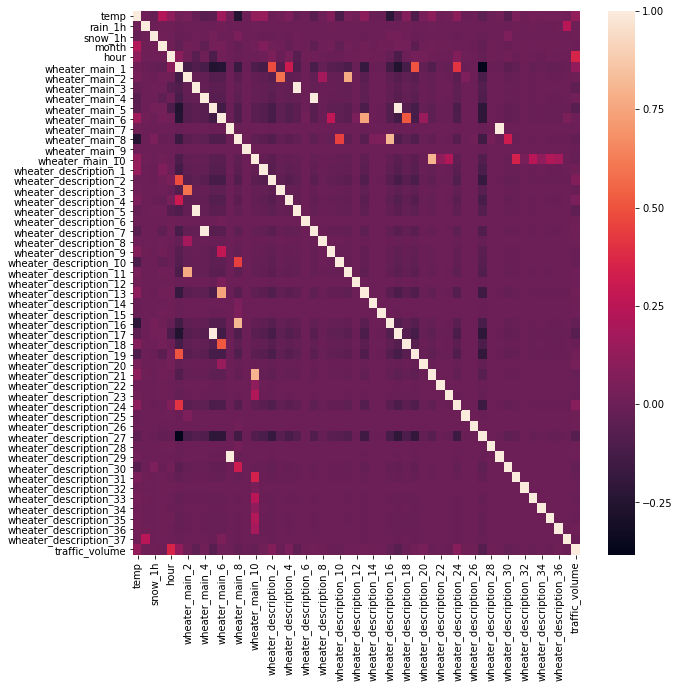

In [358]:
import seaborn as sns

correlations = df_norm.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correlations)
plt.show()

# Modelling

### Train-test split

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
features = list(df_norm.columns[:-1]) #features names

X_train, X_test, y_train, y_test = train_test_split(df_norm[features], df_norm['traffic_volume'], test_size=0.2)

### Linear regression

In [367]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr = clf_lr.fit(X_train, y_train)

### Neural Net

In [362]:
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers import Activation, Dropout, Flatten, Dense

In [378]:
model = Sequential()

n_cols = X_train.shape[1] #number of columns

model.add(Dense(256, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='linear'))

opt=optimizers.SGD(lr=0.01,momentum=0.9)
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])

In [379]:
model.fit(X_train, y_train, validation_split=0.2, epochs=8)

Train on 30850 samples, validate on 7713 samples
Epoch 1/8
30850/30850 [==============================] - 2s 65us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/8
30850/30850 [==============================] - 2s 57us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/8
30850/30850 [==============================] - 2s 57us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/8
30850/30850 [==============================] - 2s 58us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/8
30850/30850 [==============================] - 2s 58us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/8
30850/30850 [==============================] - 2s 57us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/8
30850/30850 [====

# Evaluation

In [368]:
clf_lr.score(X_test,y_test)

0.14993901001067977

In [369]:
X_test.head(3)

,temp,rain_1h,snow_1h,month,hour,wheater_main_1,wheater_main_2,wheater_main_3,wheater_main_4,wheater_main_5,...,wheater_description_28,wheater_description_29,wheater_description_30,wheater_description_31,wheater_description_32,wheater_description_33,wheater_description_34,wheater_description_35,wheater_description_36,wheater_description_37
45451,0.970168,0.000000,0.0,0.454545,0.782609,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44243,0.941497,0.000000,0.0,0.363636,0.608696,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47924,0.938175,0.000979,0.0,0.727273,0.782609,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [377]:
clf_lr.predict(X_test.loc[452,:])

KeyError: 45246

# Plot